# An optimal test for strategic interaction in social and economic network formation between heterogeneous agents: Python Jupyter Notebook 1
Andrin Pelican, Bryan Graham - University of California - Berkeley

November 2021 (Revised November 2024)

### Code citation:

Graham, Bryan S. and Andrin Pelican (2021). "An optimal test for strategic interaction in social and economic network formation between heterogeneous agents: Python Jupyter Notebook 1," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 18 November 2021)

This notebook reproduces the figures used to illustrative various theoretical points in the paper. The second notebook provide a tutorial on the **ugd** Python module and replication code for the empirical illustration.

In [12]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Import matplotlib & networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools as it

# Directory where graphics files will be saved
#graphics =  '/Users/bgraham/Dropbox/Replication_Code/Testing_Networks/Graphics/' # Mac machine
graphics =  '/Users/bgrah/Dropbox/Replication_Code/Testing_Networks/Graphics/'    # Windows machine

In [14]:
import sys

print("Version of Python used:")
print(sys.version)
print("")
print("networkx version:  " + nx.__version__)
print("numpy version:     " + np.__version__)


Version of Python used:
3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]

networkx version:  3.2.1
numpy version:     1.26.4


### Alternating rectangle and compact alternating hexagon figure

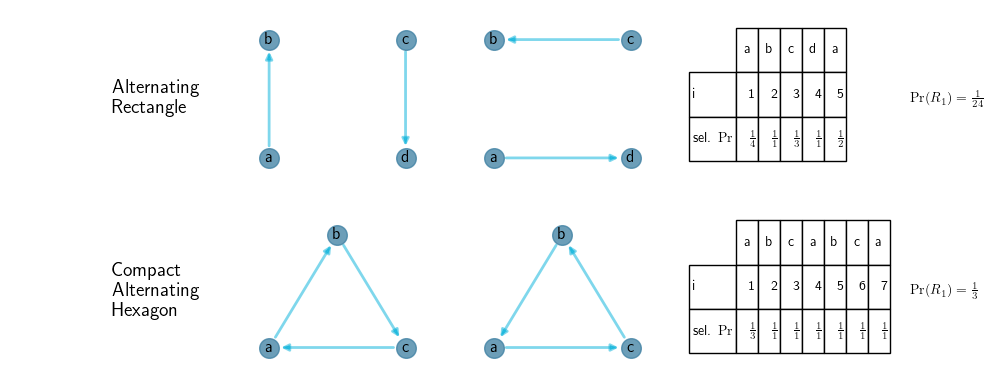

In [17]:
#--------------------------------------------------------------#
#- ALTERNATING RECTANGLE AND COMPACT ALTERNATING HEXAGON      -#
#--------------------------------------------------------------#

# Compact alternating hexagon example
G1 = nx.DiGraph()  
G1.add_nodes_from(["a", "b", "c"])

A1 = [("a","b"), ("b","c"), ("c","a")]
CA1 = [("b","a"), ("c", "b"), ("a","c")]

G1.add_edges_from(A1, color = '#00B0DA', style = 'solid', alpha = 1)
G1.add_edges_from(CA1, color = '#00B0DA', style = 'dashed', alpha = 0.5)

# Alternating rectangle example
G2 = nx.DiGraph()  
G2.add_nodes_from(["a", "b", "c", "d"])

A2 = [("a","b"),("c","d")]
CA2 = [("c","b"),("a","d")]

G2.add_edges_from(A2, color = '#00B0DA', style = 'solid', alpha = 1)
G2.add_edges_from(CA2, color = '#00B0DA', style ='dashed', alpha = 0.5)

#---------------------------------------------#
#- DRAW DIAGRAPH CANONICAL SCHLAUFE EXAMPLES -#
#---------------------------------------------#

# Create figure with six panels
f, axes = plt.subplots(2,4, figsize=(10, 4))
plt.rc('text', usetex=True)


# Label first row of figures 
ax = axes[0,0]
plt.axes(ax)
plt.axis('off')   
plt.annotate('Alternating\nRectangle', xy=(0.5, 0.5), \
             horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, \
             fontsize=14)

#---------------------------------------------------------#
#- (i) Alternating Rectange        (first configuration) -#
#---------------------------------------------------------#
ax = axes[0,1]
plt.axes(ax)
plt.axis('off')   

node_pos = {"a": [0,0], "b": [0,1], "c": [1,1], "d": [1,0]} 

nx.draw_networkx_labels(G2, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G2, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)

for e in G2.edges():
    style = G2[e[0]][e[1]]['style']
    if (style!='dashed'):
        collection = nx.draw_networkx_edges(G2, pos = node_pos, edgelist = [e], \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)
        for patch in collection:
            patch.set_linestyle('solid')
 
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axis('off')

#---------------------------------------------------------#
#- (ii)  Alternating Rectange     (second configuration) -#
#---------------------------------------------------------#
ax = axes[0,2]
plt.axes(ax)
plt.axis('off')   

nx.draw_networkx_labels(G2, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G2, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)

for e in G2.edges():
    style = G2[e[0]][e[1]]['style']
    if (style=='dashed'):
        collection = nx.draw_networkx_edges(G2, pos = node_pos, edgelist = [e], \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)
        for patch in collection:
            patch.set_linestyle('solid')
 
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axis('off')

#---------------------------------------------#
#- (iii) Alternating Rectange Schlaufe Table -#
#---------------------------------------------#
ax = axes[0,3]
plt.axes(ax)
plt.axis('off')

# Table for alternating rectange
vertex = ('a', 'b', 'c', 'd', 'a')
i      = [[1, 2, 3, 4, 5], \
          [r'$\frac{1}{4}$', r'$\frac{1}{1}$', r'$\frac{1}{3}$', r'$\frac{1}{1}$', r'$\frac{1}{2}$']]

Schlaufe_1_Table = plt.table(cellText=i, rowLabels=['  i  ', 'sel. ' + r'$\Pr$'], colLabels=vertex, loc='upper right', \
                             colWidths = [0.1]*len(vertex), fontsize = 12, bbox=[0.25,0.15,0.75*(5/7),0.75])
plt.text(1.1, 1/2, r'$\Pr(R_{1}) = \frac{1}{24}$', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)


# Label second row of figures
ax = axes[1,0]
plt.axes(ax)
plt.axis('off')   
plt.annotate('Compact\nAlternating\nHexagon', xy=(0.5, 0.5), \
             horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, \
             fontsize=14)

#---------------------------------------------------------#
#- (iv) Compact Alternating Hexagon (first configuration)-#
#---------------------------------------------------------#
ax = axes[1,1]
plt.axes(ax)
plt.axis('off')   

node_pos = {"a": [0,0], "b": [0.5,np.sqrt(0.75)], "c": [1,0]} 
nx.draw_networkx_labels(G1, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G1, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)

for e in G1.edges():
    style = G1[e[0]][e[1]]['style']
    if (style!='dashed'):
        collection = nx.draw_networkx_edges(G1, pos = node_pos, edgelist = [e], \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)
        for patch in collection:
            patch.set_linestyle('solid')
 
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,np.sqrt(0.75)+0.25])
ax.axis('off')

#---------------------------------------------------------#
#- (v) Compact Alternating Hexagon (second configuration)-#
#---------------------------------------------------------#
ax = axes[1,2]
plt.axes(ax)
plt.axis('off')   

nx.draw_networkx_labels(G1, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G1, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)

for e in G1.edges():
    style = G1[e[0]][e[1]]['style']
    if (style=='dashed'):
        collection = nx.draw_networkx_edges(G1, pos = node_pos, edgelist = [e], \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)
        for patch in collection:
            patch.set_linestyle('solid')
 
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,np.sqrt(0.75)+0.25])
ax.axis('off')

#----------------------------------------------------#
#- (vi ) Compact Alternating Hexagon Schlaufe Table -#
#----------------------------------------------------#
ax = axes[1,3]
plt.axes(ax)
plt.axis('off')

# Table for compact alternating hexagon
vertex = ('a', 'b', 'c', 'a', 'b', 'c', 'a')
i      = [[1, 2, 3, 4, 5, 6, 7], \
          [r'$\frac{1}{3}$', r'$\frac{1}{1}$', r'$\frac{1}{1}$', r'$\frac{1}{1}$', r'$\frac{1}{1}$',\
           r'$\frac{1}{1}$',  r'$\frac{1}{1}$']]

Schlaufe_Table = plt.table(cellText=i, rowLabels=['  i  ', 'sel. ' + r'$\Pr$'], colLabels=vertex, loc='center', \
                           colWidths = [0.1]*len(vertex), fontsize = 12, bbox=[0.25,0.15,0.75,0.75])

#for cell in Schlaufe_Table: cell.set_height(2)

plt.text(1.1, 1/2, r'$\Pr(R_{1}) = \frac{1}{3}$', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)


# Save result (png)
plt.tight_layout()
plt.savefig(graphics+'Schlaufe_Basic_Example.png', dpi=500) 

# Save result (eps)
#plt.tight_layout()
#plt.savefig(graphics+'Schlaufe_Basic_Example.eps', dpi=500) 

The figure above does not appear in the current paper, but did appear in earlier drafts.

### Complete schlaufen example

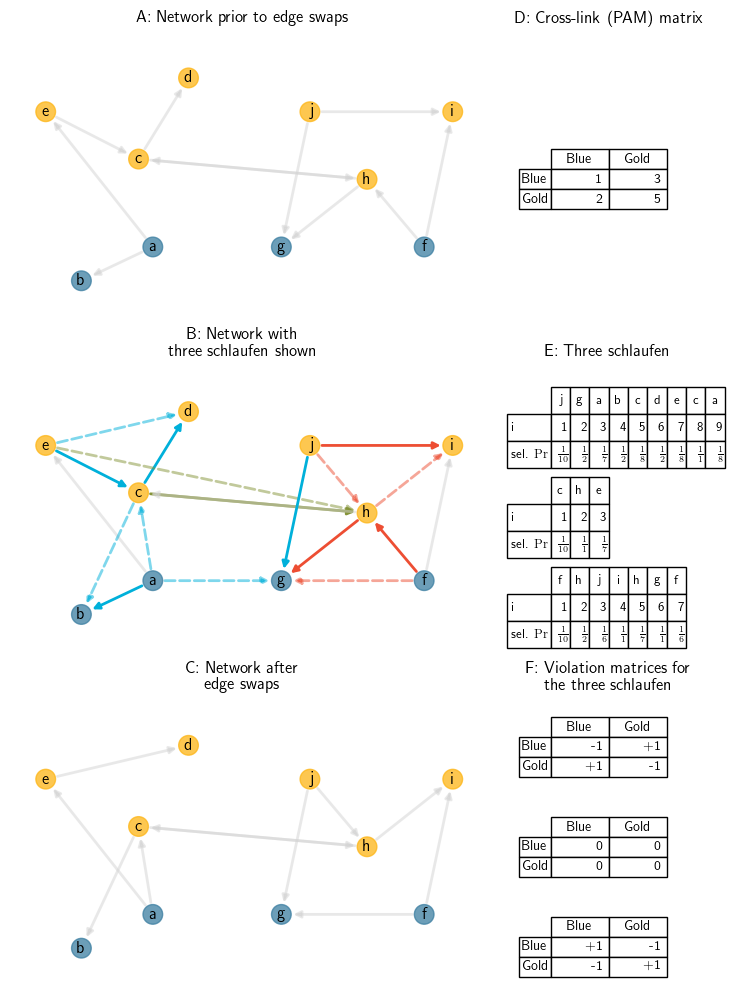

In [21]:
#------------------------------------------#
#- CREATE DIAGRAPH WITH THREE SCHLAUFE    -#
#------------------------------------------#

G = nx.DiGraph()  
G.add_nodes_from(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])

# Schlaufe 1
A1 = [("j","g"), ("a","b"), ("c","d"), ("e","c")]
CA1 = [("a","g"), ("c", "b"), ("e","d"), ("a","c")]

G.add_edges_from(A1, color = '#00B0DA', style = 'solid', alpha = 1)
G.add_edges_from(CA1, color = '#00B0DA', style = 'dashed', alpha = 0.5)

# Schlaufe 2
A2 = [("c","h")]
CA2 = [("e","h")]

G.add_edges_from(A2, color = '#859438', style = 'solid', alpha = 1)
G.add_edges_from(CA2, color = '#859438', style ='dashed', alpha = 0.5)

# Schlaufe 3
A2 = [("f","h"), ("j", "i"), ("h", "g")]
CA2 = [("j","h"), ("h","i"), ("f", "g")]

G.add_edges_from(A2, color = '#ED4E33', style = 'solid', alpha = 1)
G.add_edges_from(CA2, color = '#ED4E33', style ='dashed', alpha = 0.5)

# Add additional edges to graph
AA = [("a","e"), ("h", "c"), ("f","i")]

G.add_edges_from(AA, color = '#D3D3D3', style = 'solid', alpha = 0.5)

# Node Colors (divides vertices into two groups)
node_colors = {"a" : '#3B7EA1', "b" : '#3B7EA1', "c" : '#FDB515',  "d" : '#FDB515', "e" : '#FDB515', \
               "f" : '#3B7EA1', "g" : '#3B7EA1', "h" : '#FDB515',  "i" : '#FDB515', "j" : '#FDB515'} 
nx.set_node_attributes(G, node_colors, name="color")

#------------------------------------------#
#- DRAW DIAGRAPH WITH THREE SCHLAUFE      -#
#------------------------------------------#

# Node positions
node_pos = {"a": [0.75,-0.5], "b": [0.25,-0.75], "c": [0.65,0.15], "d": [1,0.75], "e": [0,0.5], \
            "f": [2.65,-0.5], "g": [1.65,-0.5], "h": [2.25,0], "i": [2.85,0.5], "j": [1.85,0.5]} 

# Get colors for nodes
nodes, node_colors = zip(*nx.get_node_attributes(G,'color').items()) 

# Create figure with six panels
f, axes = plt.subplots(3,2, figsize=(7.5, 10), gridspec_kw = {'width_ratios':[2, 1]})
plt.rc('text', usetex=True)

#--------------------------------------#
#- (i) Draw network before edge swaps -#
#--------------------------------------#
ax = axes[0,0]
plt.axes(ax)
plt.axis('off')   
nx.draw_networkx_labels(G, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G, pos = node_pos, node_color = node_colors, node_size = 200, alpha = 0.75)

for e in G.edges():
    style = G[e[0]][e[1]]['style']
    if (style!='dashed'):
        collection = nx.draw_networkx_edges(G, pos = node_pos, edgelist = [e], \
                                            edge_color = '#D3D3D3', alpha = 0.5, width = 2, arrows = True)
        for patch in collection:
            patch.set_linestyle('solid')
 
ax.axes.set_xlim([-0.25,3])
ax.axes.set_ylim([-1,1])
ax.axis('off')

# Add title
plt.title("A: Network prior to edge swaps" , fontsize=12, y = 1.05)

#------------------------------------------------#
#- (ii) Draw network with schlaufen highlighted -#
#------------------------------------------------#
ax = axes[1,0]
plt.axes(ax)
plt.axis('off')   
nx.draw_networkx_labels(G, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G, pos = node_pos, node_color = node_colors, node_size = 200, alpha = 0.75)

for e in G.edges():
    color = G[e[0]][e[1]]['color']
    style = G[e[0]][e[1]]['style']
    alpha = G[e[0]][e[1]]['alpha']
    collection = nx.draw_networkx_edges(G, pos = node_pos, edgelist = [e], \
                                        edge_color = color, alpha = alpha, width = 2, arrows = True)
    for patch in collection:
        patch.set_linestyle(style)
 
ax.axes.set_xlim([-0.25,3])
ax.axes.set_ylim([-1,1])
ax.axis('off')

# Add title
plt.title("B: Network with \n three schlaufen shown" , fontsize=12, y = 1.05)

#---------------------------------#
#- Draw network after edge swaps -#
#---------------------------------#
ax = axes[2,0]
plt.axes(ax)
plt.axis('off')
nx.draw_networkx_labels(G, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G, pos = node_pos, node_color = node_colors, node_size = 200, alpha = 0.75)

# Draw in edges in post swap digraph
post_swap_edges = [("a", "c"), ("a", "e"), ("c", "b"), ("c", "h"), ("e", "d"), \
                   ("f", "g"), ("f", "i"), ("h", "c"), ("h", "i"), ("j", "g"), ("j", "h")]
nx.draw_networkx_edges(G, pos = node_pos, edgelist = post_swap_edges, \
                                            edge_color = '#D3D3D3', alpha = 0.5, width = 2, arrows = True)
            
 
ax.axes.set_xlim([-0.25,3])
ax.axes.set_ylim([-1,1])
ax.axis('off')

# Add title
plt.title("C: Network after \n edge swaps" , fontsize=12, y = 1.05)

#---------------------------------------#
#- DRAW CROSS LINK MATRIX              -#
#---------------------------------------#
ax = axes[0,1]
plt.axes(ax)
plt.axis('off')

# Degree sequence table
columns = ('In', 'Out')
vertices = ('  a  ', '  b  ', '  c  ', '  d  ', '  e  ', '  f  ', '  g  ', '  h  ', '  i  ', '  j  ')
i       = [[0,2],\
           [1,0],\
           [2,2],\
           [1,0],\
           [1,1],\
           [0,2],\
           [2,0],\
           [2,2],\
           [2,0],\
           [0,2]]
#Degree_Sequence_Table = plt.table(cellText=i, rowLabels=vertices, colLabels=columns, loc='upper left', \
#                                  colWidths = [0.25]*len(columns), fontsize = 10)

# Cross link matrix
groups = ('Blue', 'Gold')
i       = [[1,3],\
           [2,5]]
Cross_Link_Matrix = plt.table(cellText=i, rowLabels=groups, colLabels=groups, \
                              loc='center', \
                              colWidths = [0.25]*len(columns), fontsize = 12)

# Add title
plt.title("D: Cross-link (PAM) matrix" , fontsize=12, y = 1.05)

#---------------------------------------#
#- DRAW SCHLAUFE TABLES                -#
#---------------------------------------#
ax = axes[1,1]
plt.axes(ax)
plt.axis('off')

# Table for first Schlaufe
vertex = ('j', 'g', 'a', 'b', 'c', 'd', 'e', 'c', 'a')
i      = [[1, 2, 3, 4, 5, 6, 7, 8, 9], \
          [r'$\frac{1}{10}$', r'$\frac{1}{2}$', r'$\frac{1}{7}$', r'$\frac{1}{2}$', r'$\frac{1}{8}$',\
           r'$\frac{1}{2}$',  r'$\frac{1}{8}$', r'$\frac{1}{1}$', r'$\frac{1}{8}$']]

Schlaufe_1_Table = plt.table(cellText=i, rowLabels=['  i  ', 'sel. ' + r'$\Pr$'], colLabels=vertex, loc='upper left', \
                             colWidths = [0.075]*len(vertex), fontsize = 12, bbox=[0.25,2/3,0.75,0.3])
#plt.text(0.85, 10/12, r'$\Pr(R_{1}) = \frac{1}{250,880}$', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)

# Table for second Schlaufe
vertex = ('c', 'h', 'e')
i      = [[1, 2, 3], \
          [r'$\frac{1}{10}$', r'$\frac{1}{1}$', r'$\frac{1}{7}$']]
Schlaufe_2_Table = plt.table(cellText=i, rowLabels=['  i  ', 'sel. ' + r'$\Pr$'], colLabels=vertex, loc = 'center left', \
                             colWidths = [0.075]*len(vertex), fontsize = 12, bbox=[0.25,1/3,0.75*(3/9),0.3])
#plt.text(0.85, 5/12, r'$\Pr(R_{2}) = \frac{1}{70}$', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)


# Table for third Schlaufe
vertex = ('f', 'h', 'j', 'i', 'h', 'g', 'f')
i      = [[1, 2, 3, 4, 5, 6, 7], \
          [r'$\frac{1}{10}$', r'$\frac{1}{2}$', r'$\frac{1}{6}$', r'$\frac{1}{1}$', r'$\frac{1}{7}$',\
           r'$\frac{1}{1}$',  r'$\frac{1}{6}$']]
Schlaufe_3_Table = plt.table(cellText=i, rowLabels=['  i  ', 'sel. ' + r'$\Pr$'], colLabels=vertex, loc = 'lower left', \
                             colWidths = [0.075]*len(vertex), fontsize = 12, bbox=[0.25,0,0.75*(7/9),0.3])
#plt.text(0.85, 1/12, r'$\Pr(R_{3}) = \frac{1}{5,040}$', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)


# Add title
plt.title("E: Three schlaufen" , fontsize=12, y = 1.05)

#---------------------------------------#
#- DRAW VIOLATION MATRICES             -#
#---------------------------------------#
ax = axes[2,1]
plt.axes(ax)
plt.axis('off')

# Violation matrix for first Schlaufe
groups = ('Blue', 'Gold')
i       = [['-1','+1'],\
           ['+1','-1']]
Violation_Matrix_1 = plt.table(cellText=i, rowLabels=groups, colLabels=groups, loc='upper center',
                               colWidths = [0.25]*len(columns), fontsize = 12)

# Violation matrix for second Schlaufe
groups = ('Blue', 'Gold')
i       = [['0','0'],\
           ['0','0']]
Violation_Matrix_2 = plt.table(cellText=i, rowLabels=groups, colLabels=groups, loc='center',
                               colWidths = [0.25]*len(columns), fontsize = 12)

# Violation matrix for third Schlaufe
groups = ('Blue', 'Gold')
i       = [['+1','-1'],\
           ['-1','+1']]
Violation_Matrix_3 = plt.table(cellText=i, rowLabels=groups, colLabels=groups, loc='lower center',
                               colWidths = [0.25]*len(columns), fontsize = 12)

# Add title
plt.title("F: Violation matrices for \n the three schlaufen" , fontsize=12, y = 1.05)

# Save result (png)
plt.tight_layout()
plt.savefig(graphics+'Schlaufe_Full_Example.png', dpi=500) 

# Save result (eps)
#plt.tight_layout()
#plt.savefig(graphics+'Schlaufe_Full_Example.eps', dpi=500) 

The figure above appears as "Figure 3" in the paper.

### Adjacency matrix hopping

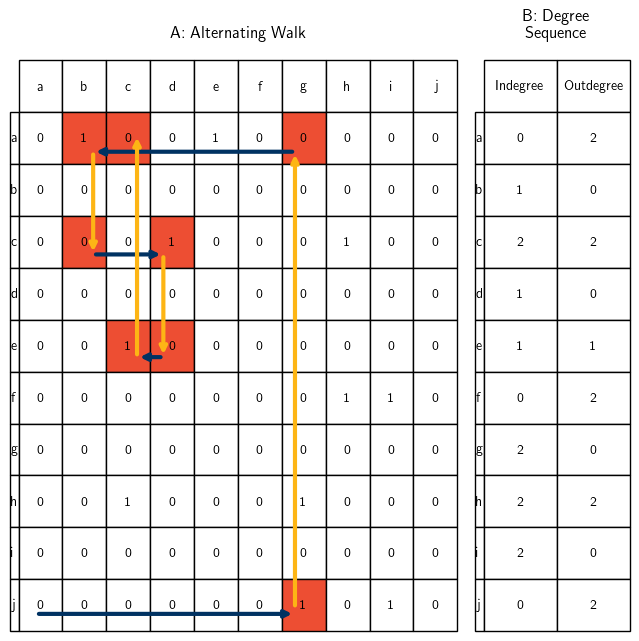

In [25]:
# Get adjacency matrix and degree sequence for example above
nodes = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')
base_edges = []
for e in G.edges():
    style = G[e[0]][e[1]]['style']
    if (style!='dashed'):
        base_edges.append(e)

G0 = nx.DiGraph()  
G0.add_nodes_from(nodes)
G0.add_edges_from(base_edges)
D = nx.to_numpy_array(G0, dtype=int)

deg_seq = []
for i in G0.nodes:
    deg_seq.append([G0.in_degree(i), G0.out_degree(i)])

f, axes = plt.subplots(1,2, figsize=(6.5, 6.5), gridspec_kw = {'width_ratios':[3, 1]})
plt.rc('text', usetex=True)

#---------------------------------------#
#- DRAW ALTERNATING WALK CONSTRUCTION  -#
#---------------------------------------#

colors = [["w", "#ED4E33", "#ED4E33", "w",       "w", "w", "#ED4E33", "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "w",       "w", "w", "w"],\
          ["w", "#ED4E33", "w",       "#ED4E33", "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "#ED4E33", "#ED4E33", "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "w",       "w", "w", "w"],\
          ["w", "w",       "w",       "w",       "w", "w", "#ED4E33", "w", "w", "w"]]
          


ax = axes[0]
plt.axes(ax)
plt.axis('off')

Adjacency_Matrix = plt.table(cellText = D.tolist(), rowLabels = nodes, colLabels = nodes, loc = 'left', \
                             colWidths = [0.075]*(len(nodes)), bbox=[0,0,1,1], cellLoc = 'center', \
                             cellColours=colors)
Adjacency_Matrix.auto_set_font_size(False)
Adjacency_Matrix.set_fontsize(10)

ax.annotate("", xy = (0.63, 0.03), xytext=(0.04, 0.03), arrowprops = dict(arrowstyle="->", color="#003262", lw = 3))
ax.annotate("", xy = (0.63, 0.84), xytext=(0.63, 0.04), arrowprops = dict(arrowstyle="->", color="#FDB515", lw = 3))
ax.annotate("", xy = (0.17, 0.84), xytext=(0.63, 0.84), arrowprops = dict(arrowstyle="->", color="#003262", lw = 3))
ax.annotate("", xy = (0.17, 0.66), xytext=(0.17, 0.84), arrowprops = dict(arrowstyle="->", color="#FDB515", lw = 3))
ax.annotate("", xy = (0.33, 0.66), xytext=(0.17, 0.66), arrowprops = dict(arrowstyle="->", color="#003262", lw = 3))
ax.annotate("", xy = (0.33, 0.48), xytext=(0.33, 0.66), arrowprops = dict(arrowstyle="->", color="#FDB515", lw = 3))
ax.annotate("", xy = (0.27, 0.48), xytext=(0.33, 0.48), arrowprops = dict(arrowstyle="->", color="#003262", lw = 3))
ax.annotate("", xy = (0.27, 0.87), xytext=(0.27, 0.48), arrowprops = dict(arrowstyle="->", color="#FDB515", lw = 3))

# Add title
plt.title("A: Alternating Walk" , fontsize=12, y = 1.025)

#---------------------------------------#
#- DRAW DEGREE SEQUENCE                -#
#---------------------------------------#

ax = axes[1]
plt.axes(ax)
plt.axis('off')

Degree_Sequence = plt.table(cellText = deg_seq, rowLabels = nodes, colLabels = ["Indegree", "Outdegree"], \
                            colWidths = [0.5]*2, cellLoc = 'center', bbox=[0,0,1,1])    
Degree_Sequence.auto_set_font_size(False)
Degree_Sequence.set_fontsize(10)

# Add title
plt.title("B: Degree\nSequence" , fontsize=12, y = 1.025)

# Save result (png)
plt.tight_layout()
plt.savefig(graphics+'Alternating_Walk_Example.png', dpi=500) 

# Save result (eps)
#plt.tight_layout()
#plt.savefig(graphics+'Alternating_Walk_Example.eps', dpi=500) 

The figure above appears as "Figure 2" in the paper.

### Figure illustrating different network benefit functions

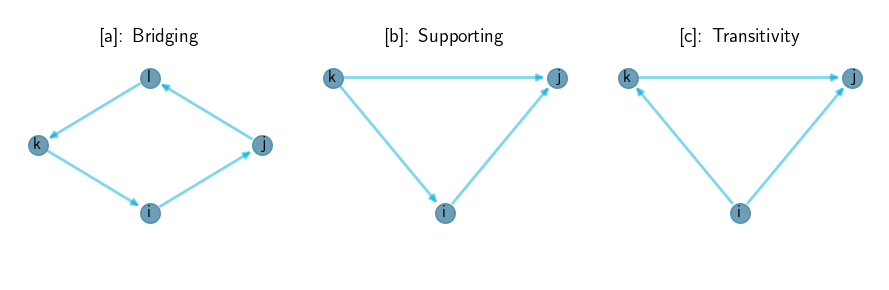

In [29]:
#--------------------------------------------------------------#
#- BRIDGING, SUPPORTING AND TRANSITIVITY EXAMPLES             -#
#--------------------------------------------------------------#

# Bridging agent example
G1 = nx.DiGraph()  
G1.add_nodes_from(["i", "j", "k", "l"])

A1 = [("k","i"), ("i","j"), ("j","l"), ("l","k")]

G1.add_edges_from(A1, color = '#00B0DA', style = 'solid', alpha = 1)

# Supporting agent example
G2 = nx.DiGraph()  
G2.add_nodes_from(["i", "j", "k"])

A2 = [("i","j"), ("k","i"), ("k","j")]

G2.add_edges_from(A2, color = '#00B0DA', style = 'solid', alpha = 1)

# Transitive triad example
G3 = nx.DiGraph()  
G3.add_nodes_from(["i", "j", "k"])

A3 = [("i","j"), ("i","k"), ("k","j")]

G3.add_edges_from(A3, color = '#00B0DA', style = 'solid', alpha = 1)

#--------------------------------------------------------#
#- DRAW BRIDGING, SUPPORTING AND TRANSITIVITY EXAMPLES  -#
#--------------------------------------------------------#

# Create figure with three panels
f, axes = plt.subplots(1,3, figsize=(9, 3))
plt.rc('text', usetex=True)

#---------------------------------------------------------#
#- BRIDGING EXAMPLE                                      -#
#---------------------------------------------------------#
ax = axes[0]
plt.axes(ax)
plt.axis('off')   

node_pos = {"i": [0,-0.25], "j": [1,0], "k": [-1,0], "l": [0,0.25]} 

nx.draw_networkx_labels(G1, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G1, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)
nx.draw_networkx_edges(G1, pos = node_pos, edgelist = A1, \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)


plt.annotate('[a]: Bridging', xy=(0, 0.4), \
             horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, \
             fontsize=14)

ax.axes.set_xlim([-1.25,1.25])
ax.axes.set_ylim([-0.5,0.5])
ax.axis('off')

#---------------------------------------------------------#
#- SUPPORTING EXAMPLE                                    -#
#---------------------------------------------------------#
ax = axes[1]
plt.axes(ax)
plt.axis('off')   

node_pos = {"i": [0,-0.25], "j": [1,0.25], "k": [-1,0.25]} 

nx.draw_networkx_labels(G2, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G2, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)
nx.draw_networkx_edges(G2, pos = node_pos, edgelist = A2, \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)

plt.annotate('[b]: Supporting', xy=(0, 0.4), \
             horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, \
             fontsize=14)

ax.axes.set_xlim([-1.25,1.25])
ax.axes.set_ylim([-0.5,0.5])
ax.axis('off')

#---------------------------------------------------------#
#- TRANSITIVITY EXAMPLE                                  -#
#---------------------------------------------------------#
ax = axes[2]
plt.axes(ax)
plt.axis('off')   

node_pos = {"i": [0,-0.25], "j": [1,0.25], "k": [-1,0.25]} 

nx.draw_networkx_labels(G3, pos = node_pos, \
                        labels = {v : v for v,pos in node_pos.items()}, font_size = 12, font_color = 'k')
nx.draw_networkx_nodes(G3, pos = node_pos, node_color = '#3B7EA1', node_size = 200, alpha = 0.75)
nx.draw_networkx_edges(G3, pos = node_pos, edgelist = A3, \
                                            edge_color = '#00B0DA', alpha = 0.5, width = 2, arrows = True)

plt.annotate('[c]: Transitivity', xy=(0, 0.4), \
             horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, \
             fontsize=14)

ax.axes.set_xlim([-1.25,1.25])
ax.axes.set_ylim([-0.5,0.5])
ax.axis('off')

# Save result (png)
plt.tight_layout()
plt.savefig(graphics+'Network_Benefit_Examples.png', dpi=500) 

# Save result (eps)
#plt.tight_layout()
#plt.savefig(graphics+'Network_Benefit_Examples.eps', dpi=500) 

The figure above appears as "Figure 1" in the paper.